In [96]:
% matplotlib inline

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [129]:
path = os.path.join('calcs.csv')
df = pd.read_csv(path)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,EDU_SCALED,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882353,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882353,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,4.294118,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.411765,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.411765,3.0,30.0,0.0,1445,0.719,1.215


In [184]:
df.count()
df = df.dropna(how='any')
df.count()

Subject ID    354
MRI ID        354
Group         354
Visit         354
MR Delay      354
M/F           354
Hand          354
Age           354
EDUC          354
EDU_SCALED    354
SES           354
MMSE          354
CDR           354
eTIV          354
nWBV          354
ASF           354
Age Group     354
dtype: int64

In [185]:
df.head()
df2 = df.set_index(['Subject ID','MRI ID'])
df2.head()

Group  Visit  MR Delay M/F Hand  Age  EDUC  \
Subject ID MRI ID                                                         
OAS2_0018  OAS2_0018_MR1  Demented      1         0   F    R   87    14   
           OAS2_0018_MR3  Demented      3       489   F    R   88    14   
OAS2_0020  OAS2_0020_MR1  Demented      1         0   M    R   80    20   
OAS2_0031  OAS2_0031_MR1  Demented      1         0   F    R   86    12   
           OAS2_0031_MR2  Demented      2       446   F    R   88    12   

                          EDU_SCALED  SES  MMSE  CDR  eTIV   nWBV    ASF  \
Subject ID MRI ID                                                          
OAS2_0018  OAS2_0018_MR1    2.882353  1.0  30.0  0.0  1406  0.715  1.248   
           OAS2_0018_MR3    2.882353  1.0  29.0  0.0  1398  0.713  1.255   
OAS2_0020  OAS2_0020_MR1    4.294118  1.0  29.0  0.0  1587  0.693  1.106   
OAS2_0031  OAS2_0031_MR1    2.411765  3.0  30.0  0.0  1430  0.718  1.227   
           OAS2_0031_MR2    2.411765  3.0  30.0  0.0  1445  0.719  1.215   

                         Age Group  
Subject ID MRI ID                   
OAS2_0018  OAS2_0018_MR1     84-87  
           OAS2_0018_MR3     87-90  
OAS2_0020  OAS2_0020_MR1     78-81  
OAS2_0031  OAS2_0031_MR1     84-87  
           OAS2_0031_MR2     87-90

M/F
F    84
M    58
Name: Subject ID, dtype: int64


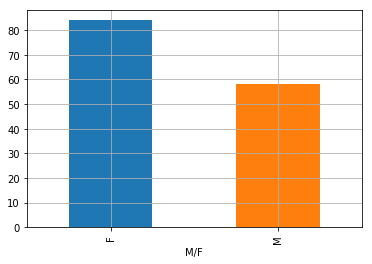

In [190]:
# LOOK OVER THIS; solved
df3 = df.drop_duplicates(['Subject ID']).groupby('M/F').count()['Subject ID']
bar = df3.plot(kind='bar',grid=True)
print(df3)

Group
Demented       70
Nondemented    72
Name: Subject ID, dtype: int64

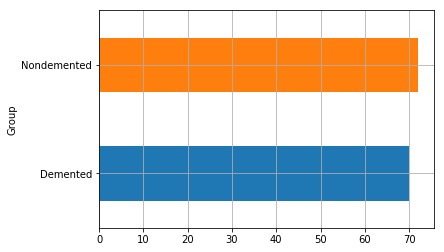

In [223]:
df4 = df.drop_duplicates(['Subject ID'],keep='last').groupby('Group').count()['Subject ID']
bar2 = df4.plot(kind='barh',grid=True)
df4

Group
Demented       70.0
Nondemented    72.0
dtype: float64

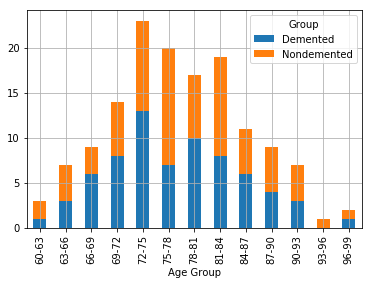

In [231]:
bins = np.arange(60,100,3)
# len(bins) # = 14
groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]

df['Age Group'] = pd.cut(df['Age'],bins,labels=groups,include_lowest=True)

# if possible, combine converted to demented for this chart
df5 = df.loc[df['Group'] == 'Converted', 'Group'] = 'Demented'

df5 = df.drop_duplicates(['Subject ID'],keep='last').groupby(['Age Group','Group']).count()['Subject ID'].unstack()
df5.head(20)
bar3 = df5.plot(kind='bar',stacked=True,grid=True)
df5.sum()


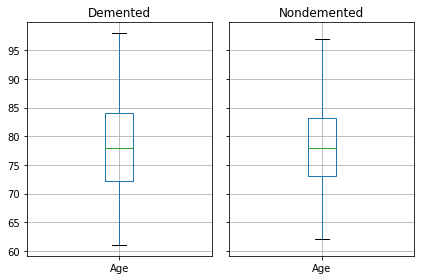

In [225]:
# converted = df.loc
# demented = 
# nondemented = 
# temp = pd.DataFrame({'Converted':})

df6 = df[['Subject ID','Group','Age']].drop_duplicates(['Subject ID'],keep='last').groupby('Group')
df6.head()

# df5 = df.groupby(['Age Group','Group']).count()['Subject ID'].unstack()
box4 = df6.boxplot()
plt.tight_layout()

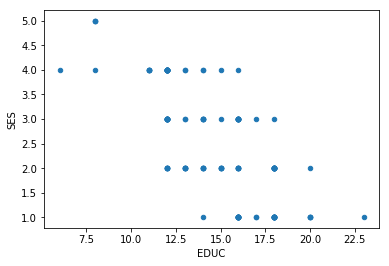

In [226]:
# NO TREND TO FIND, dropped n/a rows
mag = df.drop_duplicates(['Subject ID'],keep='last')[['EDUC','SES']]
mag.plot.scatter(x='EDUC',y='SES')

SES
1.0    33
2.0    42
3.0    34
4.0    30
5.0     3
Name: Subject ID, dtype: int64


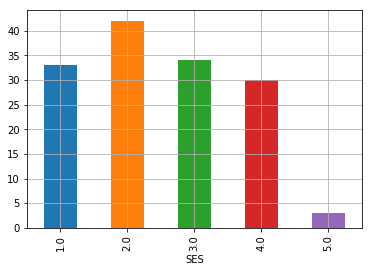

In [228]:
df7 = df.drop_duplicates(['Subject ID']).groupby('SES').count()['Subject ID']
bar5 = df7.plot(kind='bar',grid=True)
# scat = df7.plot.line()
print(df7)

EDUC
6      1
8      4
11     5
12    36
13    10
14    13
15     7
16    31
17     3
18    26
20     5
23     1
Name: Subject ID, dtype: int64


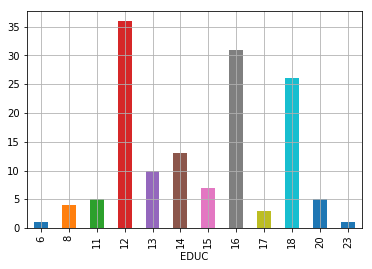

In [229]:
# bins = np.arange(1,6,1)
# len(bins) # = 14
# groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]
# groups
# df['Age Group'] = pd.cut(df['Age'],bins,labels=groups,include_lowest=True)

df7 = df.drop_duplicates(['Subject ID']).groupby('EDUC').count()['Subject ID']
bar6 = df7.plot(kind='bar',grid=True)
print(df7)

In [200]:
df2.head()

Group  Visit  MR Delay M/F Hand  Age  EDUC  \
Subject ID MRI ID                                                         
OAS2_0018  OAS2_0018_MR1  Demented      1         0   F    R   87    14   
           OAS2_0018_MR3  Demented      3       489   F    R   88    14   
OAS2_0020  OAS2_0020_MR1  Demented      1         0   M    R   80    20   
OAS2_0031  OAS2_0031_MR1  Demented      1         0   F    R   86    12   
           OAS2_0031_MR2  Demented      2       446   F    R   88    12   

                          EDU_SCALED  SES  MMSE  CDR  eTIV   nWBV    ASF  \
Subject ID MRI ID                                                          
OAS2_0018  OAS2_0018_MR1    2.882353  1.0  30.0  0.0  1406  0.715  1.248   
           OAS2_0018_MR3    2.882353  1.0  29.0  0.0  1398  0.713  1.255   
OAS2_0020  OAS2_0020_MR1    4.294118  1.0  29.0  0.0  1587  0.693  1.106   
OAS2_0031  OAS2_0031_MR1    2.411765  3.0  30.0  0.0  1430  0.718  1.227   
           OAS2_0031_MR2    2.411765  3.0  30.0  0.0  1445  0.719  1.215   

                         Age Group  
Subject ID MRI ID                   
OAS2_0018  OAS2_0018_MR1     84-87  
           OAS2_0018_MR3     87-90  
OAS2_0020  OAS2_0020_MR1     78-81  
OAS2_0031  OAS2_0031_MR1     84-87  
           OAS2_0031_MR2     87-90

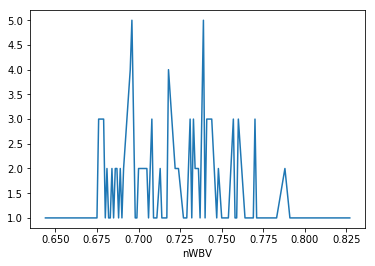

In [245]:
df8 = df.drop_duplicates(['Subject ID'],keep='last').groupby('nWBV').count()['Subject ID']
# bar7 = df8.plot(kind='bar',grid=True)
df8.plot.line()